# 📝 Exercise M4.05
In the previous notebook, we presented a non-penalized logistic regression
classifier. This classifier accepts a parameter `penalty` to add a
regularization. The regularization strength is set using the parameter `C`.

In this exercise, we ask you to train a l2-penalized logistic regression
classifier and to find by yourself the effect of the parameter `C`.

We will start by loading the dataset and create the helper function to show
the decision separation as in the previous code.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_classification.csv")
# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"
data, target = penguins[culmen_columns], penguins[target_column]

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data
}

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    return ax

Given the following candidate for the parameter `C`, find out what is the
effect of the value of this parameter on the decision boundary and on the
weights magnitude.

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Cs = [0.01, 0.1, 1, 10]
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

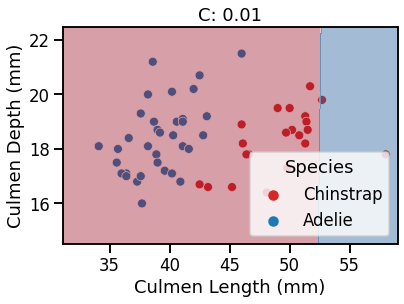

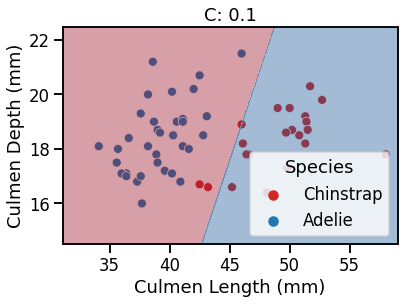

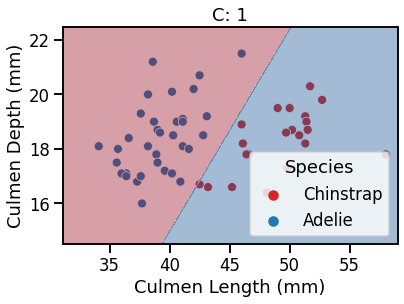

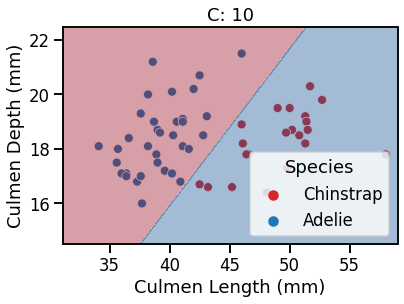

In [13]:
# Write your code here.

import seaborn as sns

for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)

    plt.figure()
    ax = sns.scatterplot(
        data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
        hue=target_column, palette=["tab:red", "tab:blue"])
    plot_decision_function(logistic_regression, range_features, ax=ax)
    plt.title(f"C: {C}")

In [15]:
weights_ridge = []
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    coefs = logistic_regression[-1].coef_[0]
    weights_ridge.append(pd.Series(coefs, index=culmen_columns))

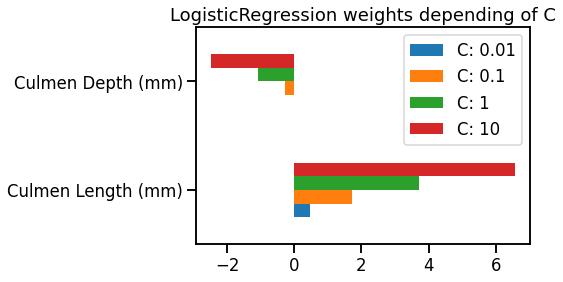

In [16]:
weights_ridge = pd.concat(
    weights_ridge, axis=1, keys=[f"C: {C}" for C in Cs])
weights_ridge.plot.barh()
_ = plt.title("LogisticRegression weights depending of C")